<a href="https://colab.research.google.com/github/codeguy234/4410Homework/blob/main/HW4V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

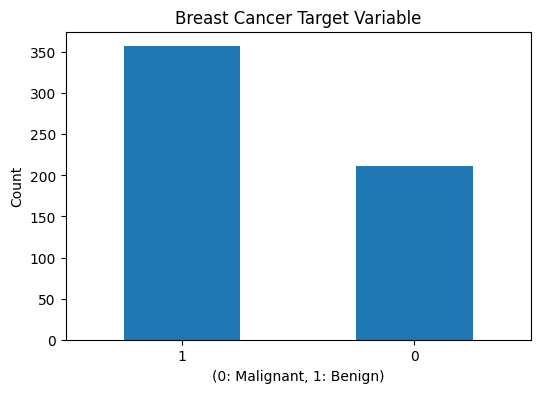

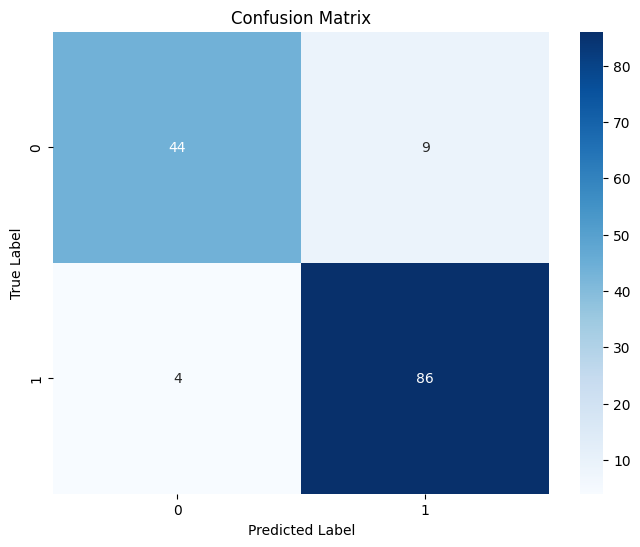

GaussianNB
KNeighborsClassifier
LogisticRegression
SVC
Training: 0.9553990610328639
Testing: 0.9090909090909091
GaussianNB: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
KNeighborsClassifier: [0.92982456 0.94736842 0.89473684 0.92982456 0.92982456 0.94736842
 0.89473684 0.94736842 0.94736842 0.91071429]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LogisticRegression: [0.98245614 0.9122807  0.89473684 0.96491228 1.         0.94736842
 0.96491228 0.92982456 0.94736842 0.96428571]
SVC: [0.96491228 0.89473684 0.85964912 0.94736842 0.9122807  0.92982456
 0.85964912 0.94736842 0.94736842 0.92857143]


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.to_csv('breast_cancer.csv', index=False)
print(data.DESCR)

print(data.target.shape) #shape variable


df['target'] = data.target
target = df.iloc[:,-1]
print(target.iloc[lambda x: x.index % 10 == 0])

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=15)
print(X_train.shape)
print(X_test.shape)

clf = GaussianNB()
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
print(train_pred)
for n in range(0,426):
  if(y_train[n]!=train_pred[n]):
    print(train_pred[n])

#KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=clf, X=data.data,
                         y=data.target, cv=kfold)

print(scores)

y_predict = clf.predict(X_test)
print(y_predict)

confusion_matrix(y_test,y_predict)

print(classification_report(y_test,y_predict))

target_counts = df['target'].value_counts()

plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.xlabel('(0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.title('Breast Cancer Target Variable')
plt.xticks(rotation=0)
plt.show()

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

nb = GaussianNB()
estimators = {'GaussianNB': nb,
                'KNeighborsClassifier': KNeighborsClassifier(),
                    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
                        'SVC': SVC(gamma='scale')
}

for name, estimator in estimators.items():
  print(name)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f"Training: {train_score}")
print(f"Testing: {test_score}")

for name, estimator in estimators.items():
  scores = cross_val_score(estimator=estimator, X=X, y=y, cv=kfold)
  print(f'{name}: {scores}')